# Preparing data


### Imports

In [1]:
import sys
from pathlib import Path

# Add parent directory to path for src imports
sys.path.insert(0, str(Path().cwd().parent))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from tqdm import tqdm

# Import from src modules
from src import (
    # Utils
    save_fig,
    CUSTOM_PALETTE_6 as custom_palette_6,
    plot_gene_expression_by_class,
    # Feature engineering
    LibraryLengthNormalizer,
    # Preprocessing
    merge_counts,
    normalize_rpm,
    extract_subset,
    # Visualization
    plot_gene_expression_by_class,
    plot_pca_for_pandas,
)

ModuleNotFoundError: No module named 'feature_engine'

In [ ]:
pd.set_option("display.max_columns", 20)
pd.set_option("display.max_rows", 400)
pd.set_option("display.precision", 5)
pd.set_option("display.max_seq_items", 50)
pd.set_option("display.max_seq_items", 50)

### Custom functions

In [ ]:
# df = merge_counts()

In [ ]:
df = pd.read_csv(
    "/home/t.afanasyeva/MAT_rebase/results/counts/MATseq_count_summary.csv", index_col=0
)

In [ ]:
train_df, labels = extract_training_subset(df)

In [ ]:
df.head(5)

NameError: name 'df' is not defined

In [ ]:
train_df = pd.read_csv(
    "/home/t.afanasyeva/MAT_rebase/results/training_data/training_data_with_labels.csv",
    index_col=0,
)
labels = train_df["label"].to_numpy()
train_df.drop(columns=["label"], inplace=True)

normalizatio and scaling for before the feature selection pipline to be implemted in main because feature selectuion pipeline has it imbuild

Figure saved to: /home/t.afanasyeva/MAT_rebase/results/figures/pca_plot_labeled.png


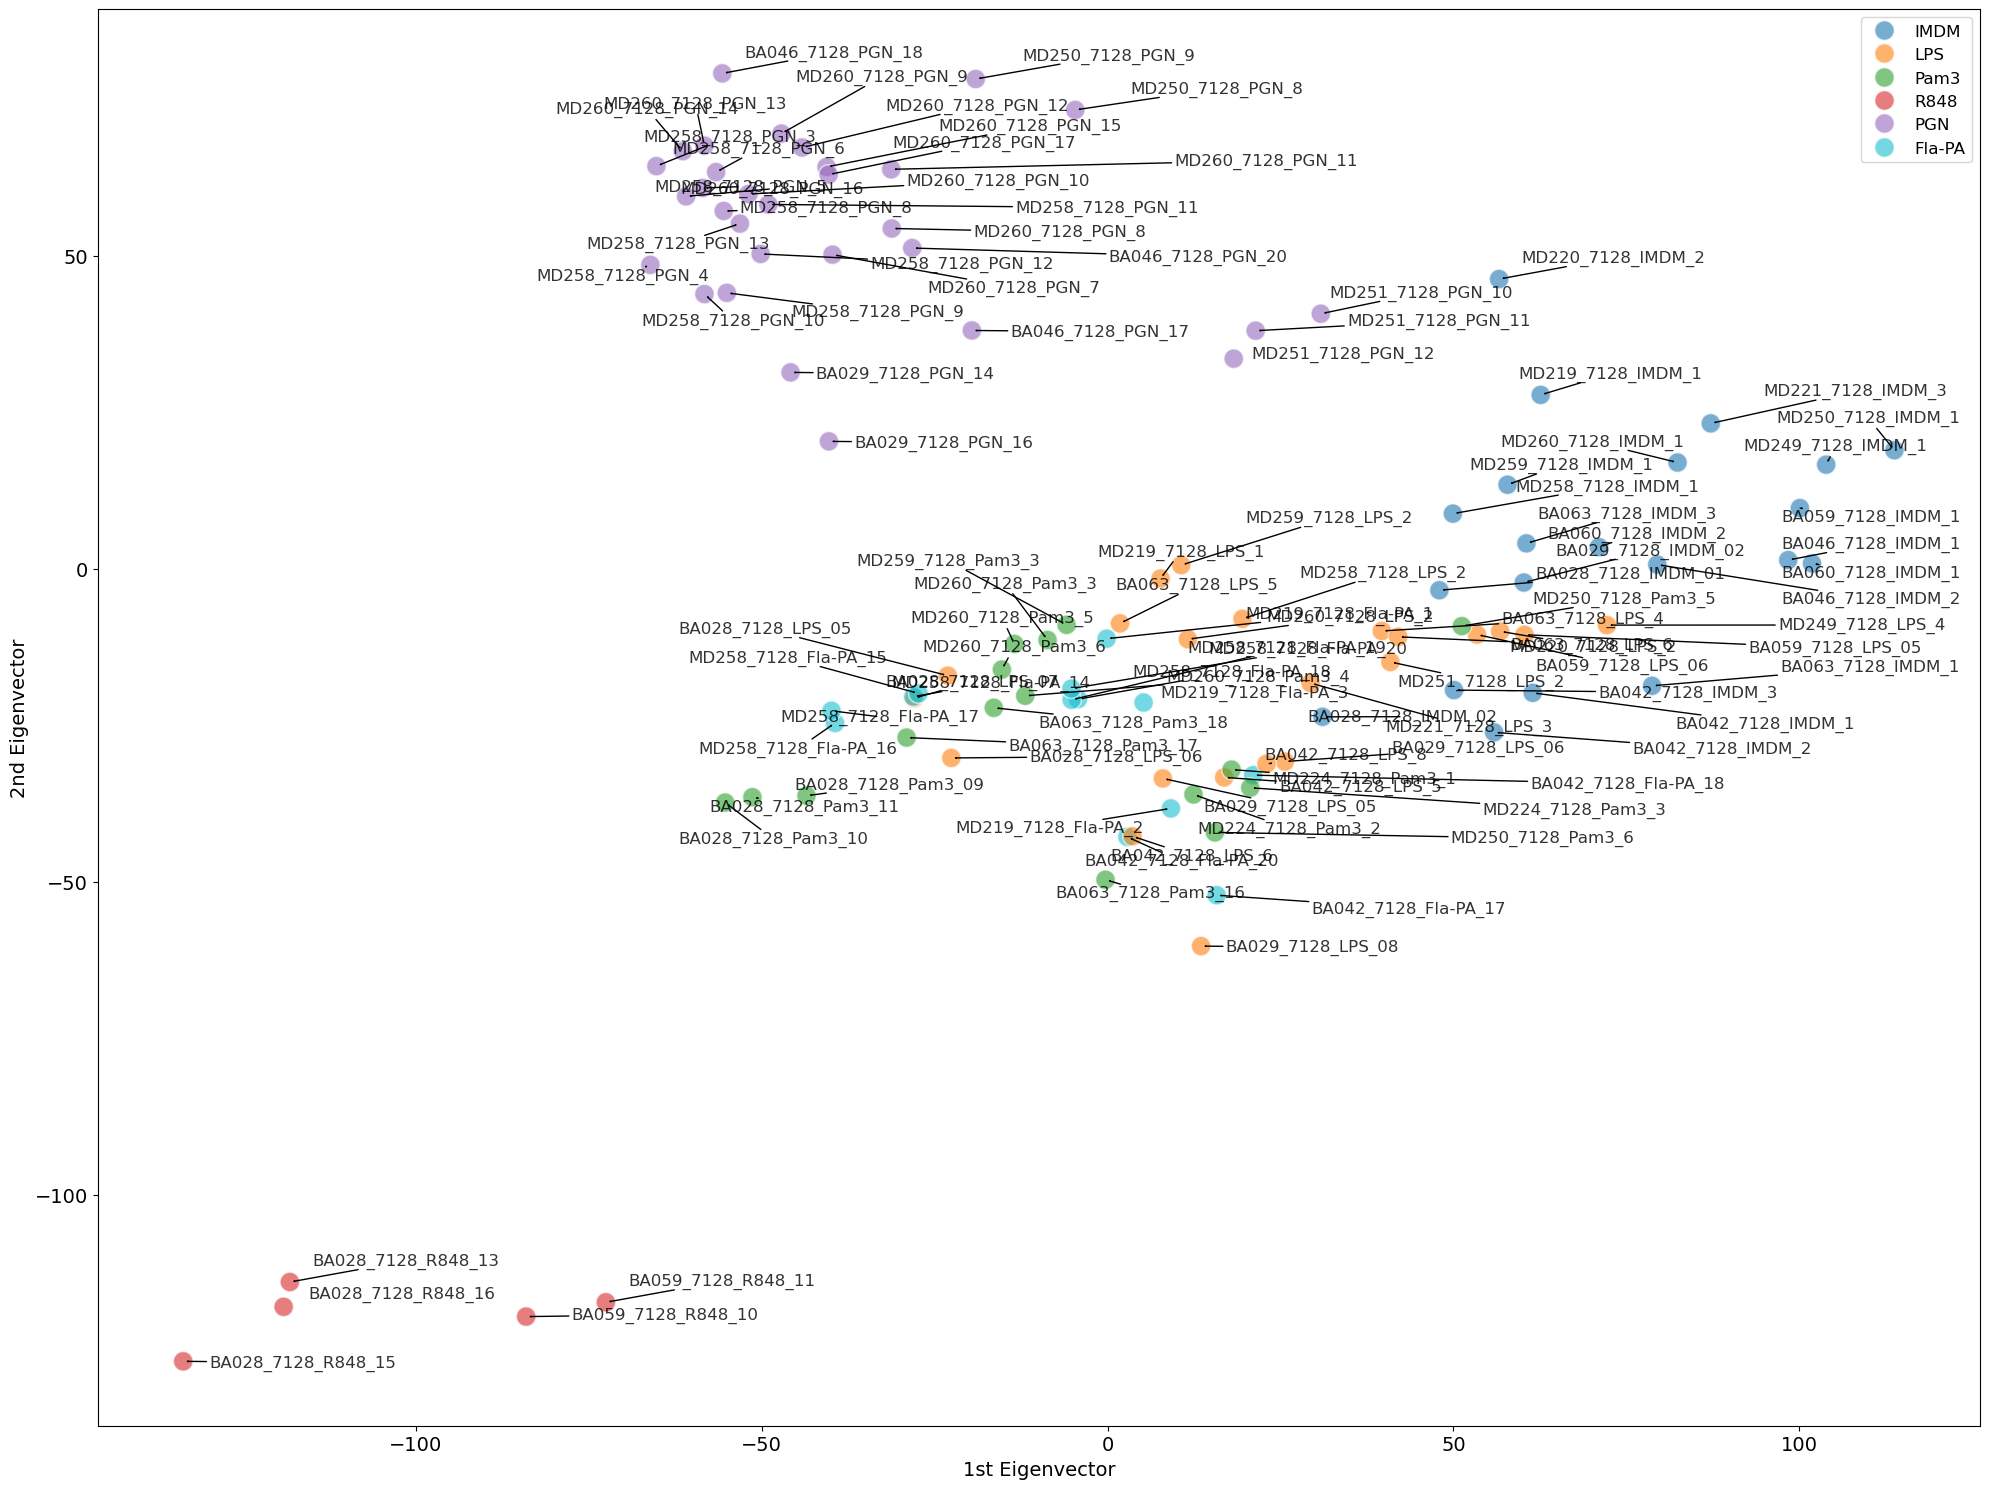

PosixPath('/home/t.afanasyeva/MAT_rebase/results/figures/pca_plot_labeled.png')

In [ ]:
normalized_df = normalize_rpm(data.copy())
scaled_data = StandardScaler().fit_transform(normalized_df)
plot_pca_for_pandas(train_df, labels, with_sample_names=True)

Before feature selection

In [ ]:
processed_data = pipe.fit_transform(normalized_df, labels)
training_labels_int = le.fit_transform(labels["label"].to_numpy())
X_reduced = PCA(n_components=2).fit_transform(processed_data)

/home/t.afanasyeva/miniforge3/envs/MATseq/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


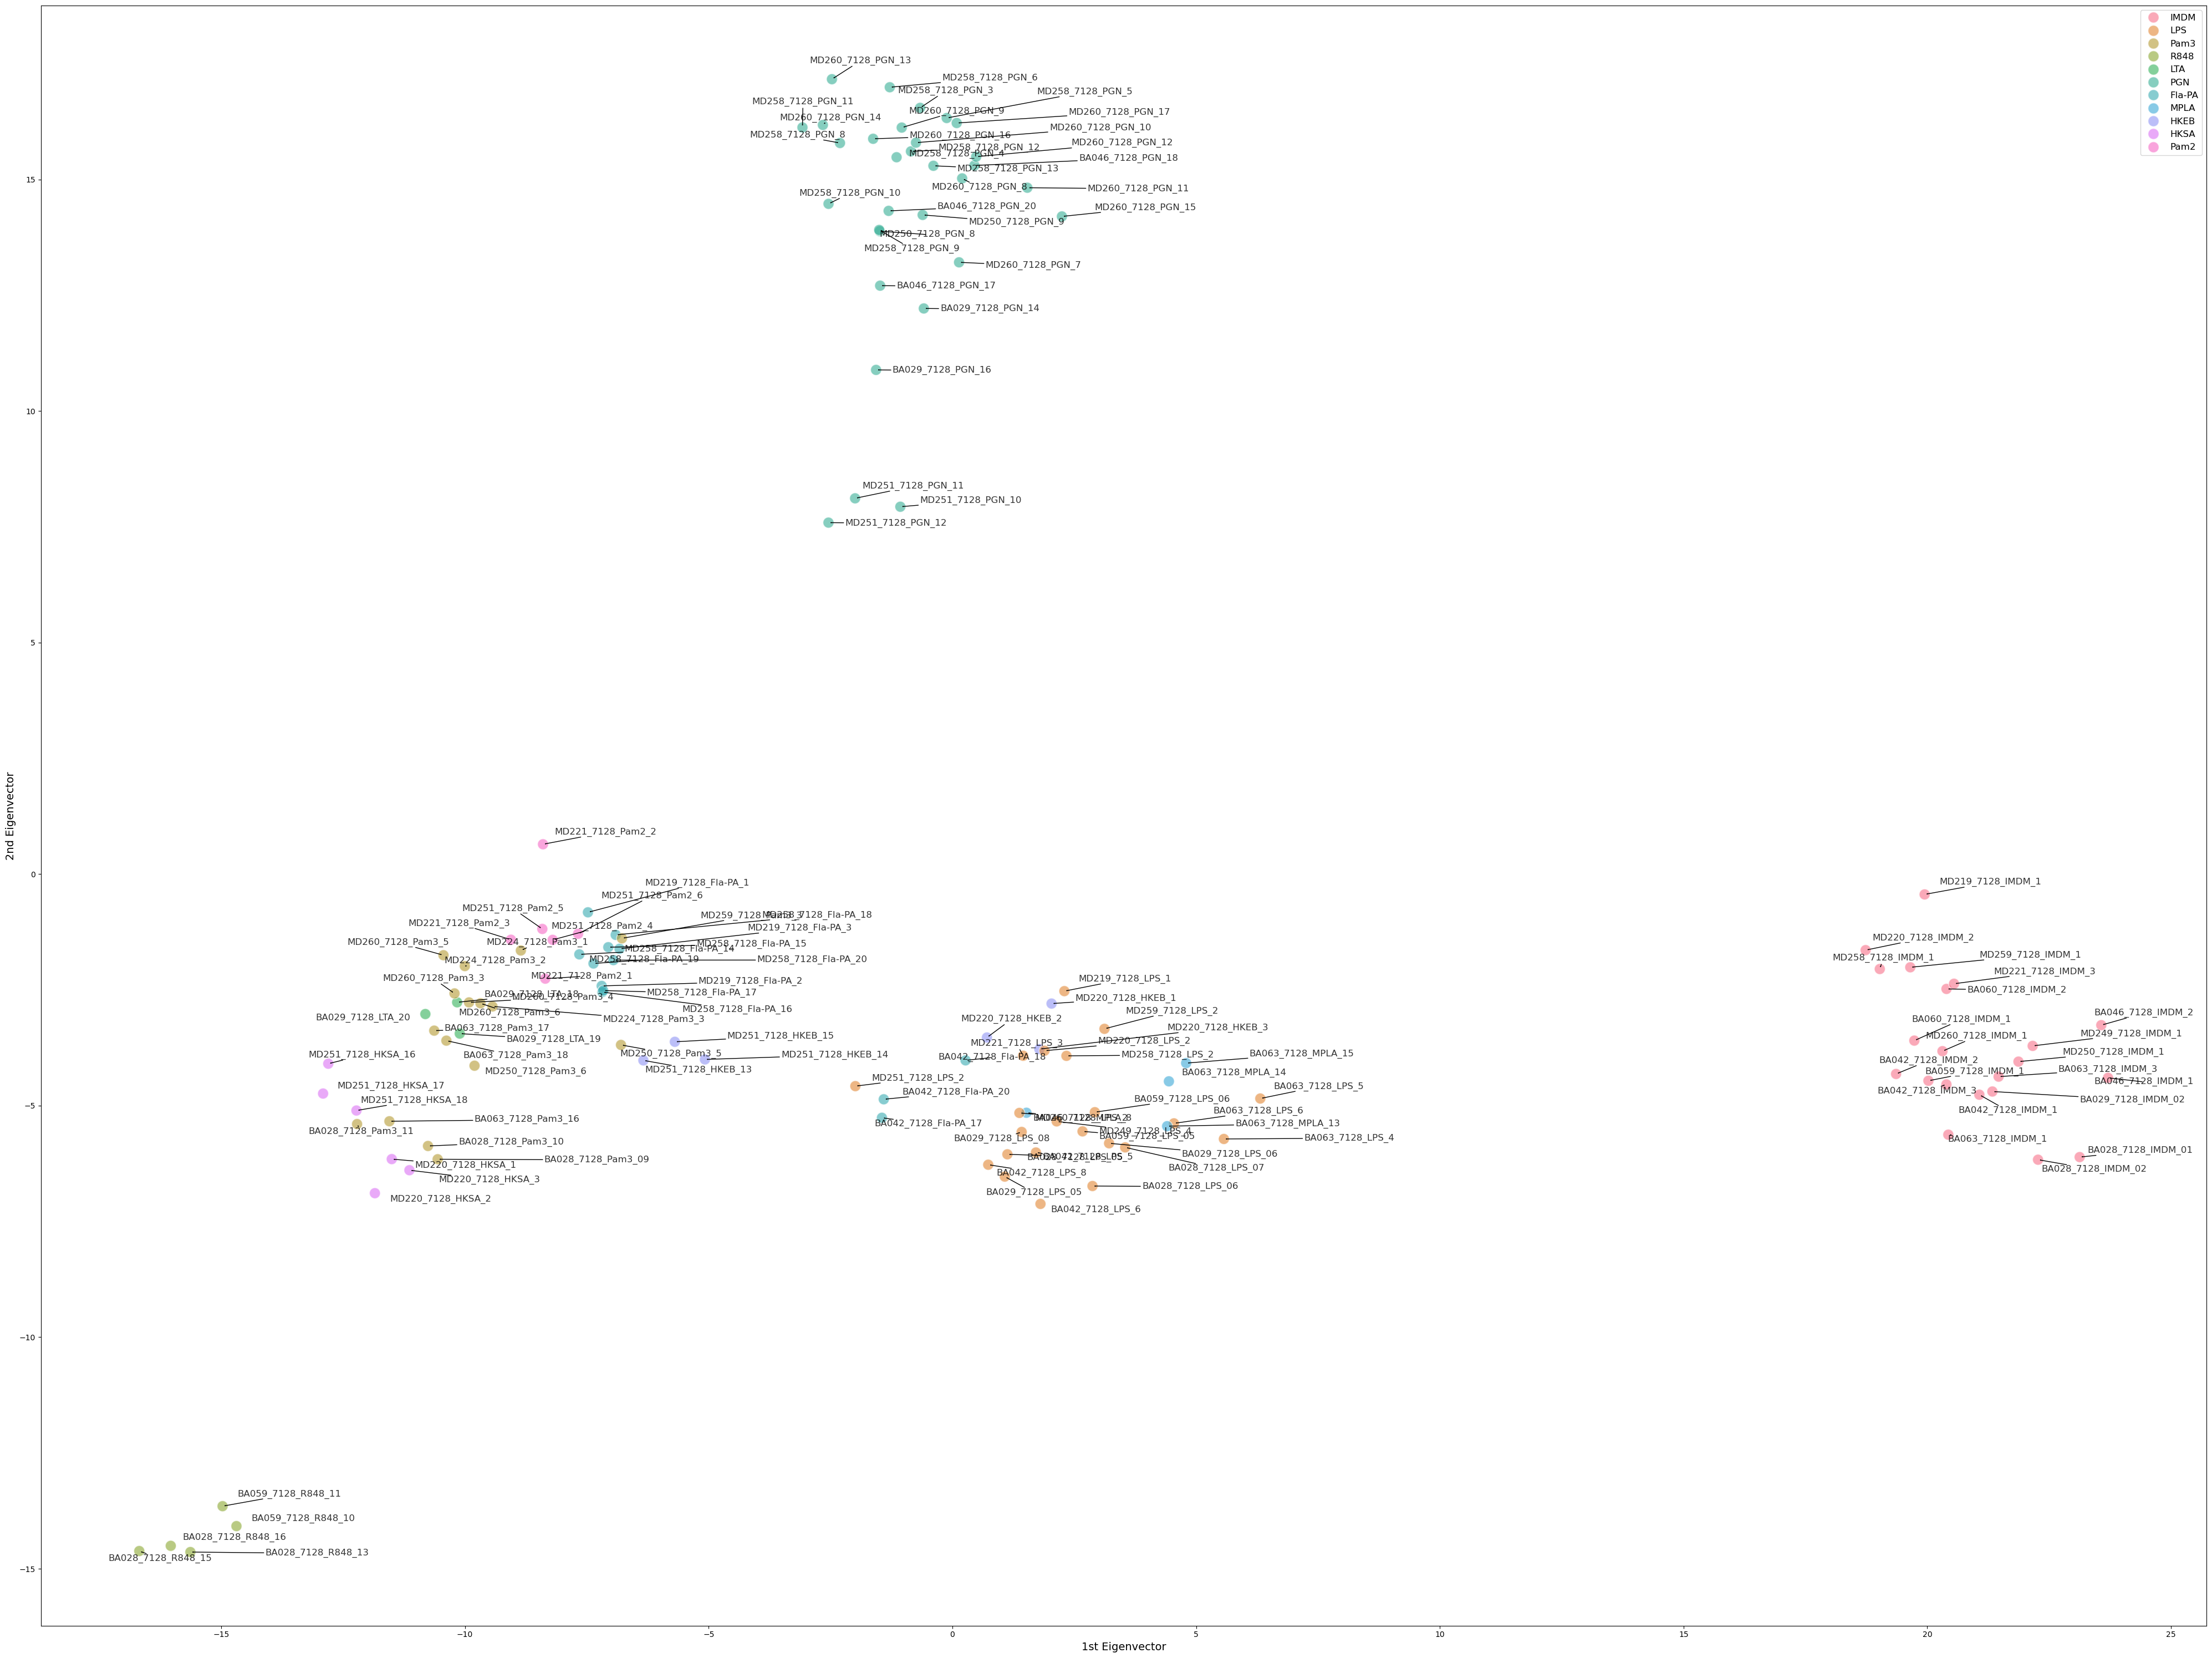

In [ ]:
fig = plt.figure(figsize=(40, 30))
ax = sns.scatterplot(
    x=X_reduced[:, 0],
    y=X_reduced[:, 1],
    hue=labels["label"].to_numpy(),
    s=200,  # Increase dot size
    alpha=0.6,
)

texts = [
    ax.text(
        X_reduced[:, 0][i],
        X_reduced[:, 1][i],
        labels.index.to_numpy()[i],
        ha="left",
        va="bottom",
        alpha=0.8,
        fontsize=12,  # Increase font size
    )
    for i in range(len(X_reduced))
]

adjust_text(texts, arrowprops=dict(arrowstyle="->", color="black"))

ax.set_xlabel("1st Eigenvector", fontsize=14)  # Increase font size
ax.set_ylabel("2nd Eigenvector", fontsize=14)  # Increase font size
ax.legend(bbox_to_anchor=(1, 1.0), ncol=1, fontsize=12)  # Increase legend font size
save_fig("PCA_plot_all_data")
plt.tight_layout()
plt.show()

## Training batch 7128

In [ ]:
# prepare_training function now imported from src.preprocessing
training_data, training_labels = prepare_training(normalized_df)

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(training_data)

X_reduced = PCA(n_components=2).fit_transform(scaled_df)
fig = plt.figure(figsize=(40, 30))
ax = sns.scatterplot(
    x=X_reduced[:, 0],
    y=X_reduced[:, 1],
    hue=labels["label"].to_numpy(),
    s=200,  # Increase dot size
    alpha=0.6,
)

# texts = [
#     ax.text(
#         X_reduced[:, 0][i],
#         X_reduced[:, 1][i],
#         labels.index.to_numpy()[i],
#         ha="left",
#         va="bottom",
#         alpha=0.8,
#         fontsize=12,  # Increase font size
#     )
#     for i in range(len(X_reduced))
# ]

# adjust_text(texts, arrowprops=dict(arrowstyle="->", color="black"))

ax.set_xlabel("1st Eigenvector", fontsize=14)  # Increase font size
ax.set_ylabel("2nd Eigenvector", fontsize=14)  # Increase font size
ax.legend(bbox_to_anchor=(1, 1.0), ncol=1, fontsize=12)  # Increase legend font size
save_fig("PCA_plot_all_data")
plt.tight_layout()
plt.show()

ValueError: All arrays must be of the same length

<Figure size 4000x3000 with 0 Axes>

### PCA on training data

In [ ]:
scaler = StandardScaler()
scaled_training_data = scaler.fit_transform(training_data)

training_labels_int = le.fit_transform(training_labels["label"].to_numpy())

colors = [
    custom_palette_6[label % len(custom_palette_6)] for label in training_labels_int
]

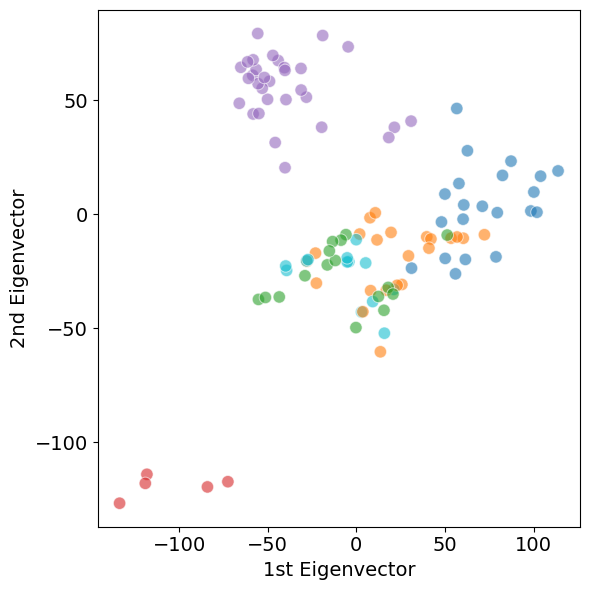

In [ ]:
fig = plt.figure(figsize=(6, 6))

X_reduced = PCA(n_components=2).fit_transform(scaled_training_data)

ax = sns.scatterplot(
    x=X_reduced[:, 0],
    y=X_reduced[:, 1],
    hue=training_labels["label"].to_numpy(),
    s=80,
    alpha=0.6,
    palette=custom_palette_6,
)
# texts = [
#     ax.text(
#         X_reduced[:, 0][i],
#         X_reduced[:, 1][i],
#         training_labels.index.to_numpy()[i],
#         ha="left",
#         va="bottom",
#         alpha=0.8,
#     )
#     for i in range(len(X_reduced))
# ]

# adjust_text(texts, arrowprops=dict(arrowstyle="->", color="black"))


ax.set_xlabel("1st Eigenvector", fontsize=14)
ax.set_ylabel("2nd Eigenvector", fontsize=14)
ax.tick_params(axis="both", labelsize=14)
ax.get_legend().remove()
plt.tight_layout()
plt.show()

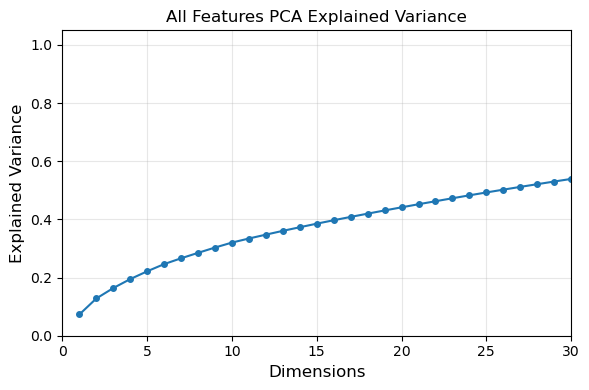

Variance explained by first 2 components: 12.80%
Variance explained by first 10 components: 32.03%


In [ ]:
# PCA Explained Variance plot
n_components = 30
pca = PCA(n_components=n_components)
pca.fit(scaled_training_data)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(
    range(1, n_components + 1),
    cumulative_variance,
    marker="o",
    markersize=4,
    linewidth=1.5,
)
ax.set_xlabel("Dimensions", fontsize=12)
ax.set_ylabel("Explained Variance", fontsize=12)
ax.set_title("All Features PCA Explained Variance", fontsize=12)
ax.set_xlim(0, n_components)
ax.set_ylim(0, 1.05)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Variance explained by first 2 components: {cumulative_variance[1]:.2%}")
print(f"Variance explained by first 10 components: {cumulative_variance[9]:.2%}")

/home/t.afanasyeva/miniforge3/envs/MATseq/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


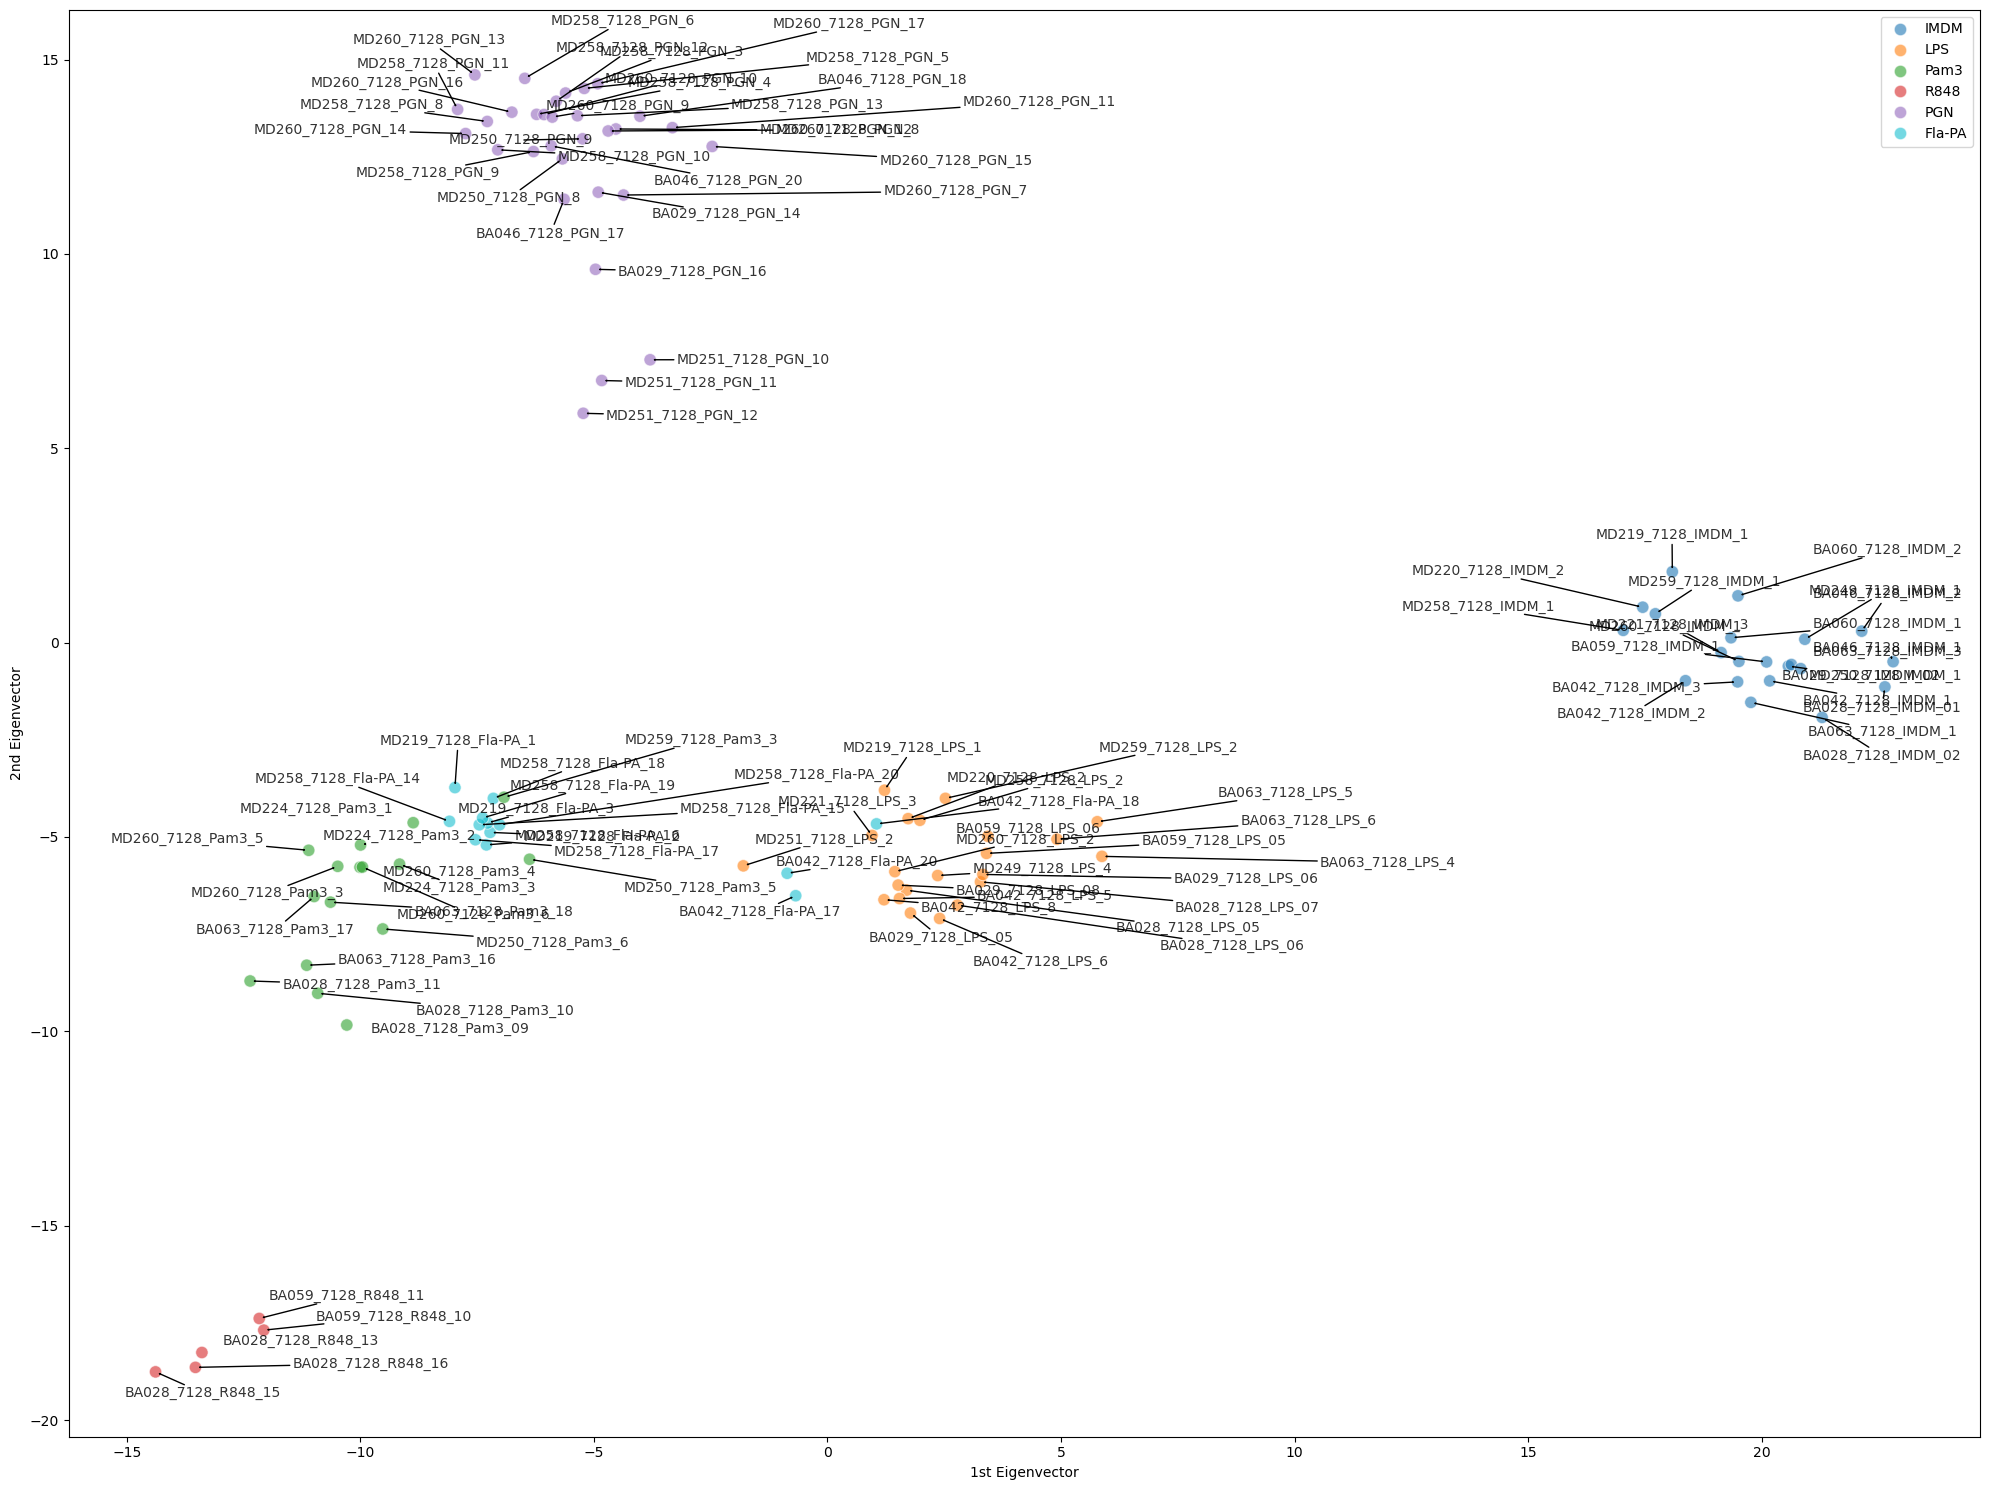

In [ ]:
processed_data = pipe.fit_transform(training_data, training_labels)
training_labels_int = le.fit_transform(training_labels["label"].to_numpy())


colors = [
    custom_palette_6[label % len(custom_palette_6)] for label in training_labels_int
]

fig = plt.figure(figsize=(20, 15))

X_reduced = PCA(n_components=2).fit_transform(processed_data)

ax = sns.scatterplot(
    x=X_reduced[:, 0],
    y=X_reduced[:, 1],
    hue=training_labels["label"].to_numpy(),
    s=80,
    alpha=0.6,
    palette=custom_palette_6,
)
texts = [
    ax.text(
        X_reduced[:, 0][i],
        X_reduced[:, 1][i],
        training_labels.index.to_numpy()[i],
        ha="left",
        va="bottom",
        alpha=0.8,
    )
    for i in range(len(X_reduced))
]

adjust_text(texts, arrowprops=dict(arrowstyle="->", color="black"))

ax.set_xlabel("1st Eigenvector")
ax.set_ylabel("2nd Eigenvector")
ax.legend(bbox_to_anchor=(1, 1.0), ncol=1)
plt.tight_layout()
plt.show()

/home/t.afanasyeva/miniforge3/envs/MATseq/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


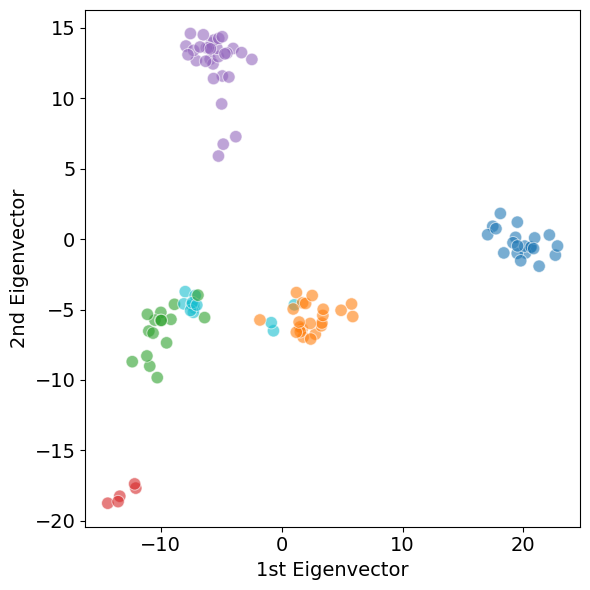

In [ ]:
processed_data = pipe.fit_transform(training_data, training_labels)
training_labels_int = le.fit_transform(training_labels["label"].to_numpy())


colors = [
    custom_palette_6[label % len(custom_palette_6)] for label in training_labels_int
]

fig = plt.figure(figsize=(6, 6))

X_reduced = PCA(n_components=2).fit_transform(processed_data)

ax = sns.scatterplot(
    x=X_reduced[:, 0],
    y=X_reduced[:, 1],
    hue=training_labels["label"].to_numpy(),
    s=80,
    alpha=0.6,
    palette=custom_palette_6,
)
ax.set_xlabel("1st Eigenvector", fontsize=14)
ax.set_ylabel("2nd Eigenvector", fontsize=14)
ax.tick_params(axis="both", labelsize=14)
ax.get_legend().remove()
plt.tight_layout()
plt.show()

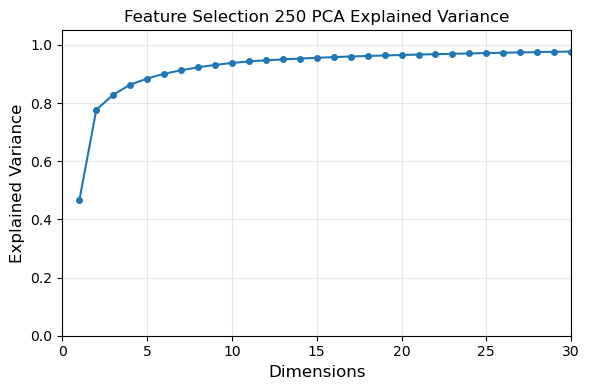

Variance explained by first 2 components: 77.71%
Variance explained by first 10 components: 93.79%


In [ ]:
# PCA Explained Variance plot
n_components = 30
pca = PCA(n_components=n_components)
pca.fit(processed_data)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(
    range(1, n_components + 1),
    cumulative_variance,
    marker="o",
    markersize=4,
    linewidth=1.5,
)
ax.set_xlabel("Dimensions", fontsize=12)
ax.set_ylabel("Explained Variance", fontsize=12)
ax.set_title("Feature Selection 250 PCA Explained Variance", fontsize=12)
ax.set_xlim(0, n_components)
ax.set_ylim(0, 1.05)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Variance explained by first 2 components: {cumulative_variance[1]:.2%}")
print(f"Variance explained by first 10 components: {cumulative_variance[9]:.2%}")